In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
def calc_sec(time):
    hms = time.split(':')
    hms = [float(x) for x in hms]
    sec = hms[2] + hms[1]*60 + hms[0]*3600
    sec = round(sec,3)
    return sec

In [100]:
def calc_ts(sec):
    ts = ''
    hr = int(sec/3600)
    mn = int((sec - (hr*3600))/60)
    sc = sec - (hr*3600) - (mn*60)
    sc = round(sc,3)
    ts += str(hr) + ':' + str(mn) + ':' + str(sc)
    # print(ts)
    return ts

In [101]:
def calc_t_period(dates,secs):
    t_period = []
    
    start_sec = secs[0]
    prev_sec = secs[0]
    prev_date = dates[0]

    for i in range(len(secs)):
        curr_sec = secs[i]
        diff_sec = curr_sec - prev_sec
        curr_date = dates[i]
        
        if((diff_sec>3.0) and (curr_date==prev_date)):
            t_period.append([curr_date,start_sec,prev_sec])
            start_sec = curr_sec
        elif(curr_date!=prev_date):
            t_period.append([prev_date,start_sec,prev_sec])
            start_sec = curr_sec
            prev_date = curr_date
        elif(i==len(secs)-1):
            t_period.append([curr_date,start_sec,curr_sec])

        prev_sec = curr_sec
    
    return t_period

In [102]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)
    
    diff_std_ = std_i**2

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [103]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

In [134]:
rec_date = '2018-12-25'
start_time = '15:25:08'
end_time = '18:08:53'

# rec_date = '2018-12-19'
# start_time = '16:17:05'
# end_time = '16:21:55'

In [136]:
filepath = 'SmartwatchData/raw_data/log_acc_25-12-18_RH.csv'
df = pd.read_csv(filepath)
filtered = [i for i in df['timestamp'] if i[:10]==rec_date and calc_sec(i[11:])>calc_sec(start_time) 
            and calc_sec(i[11:])<calc_sec(end_time)]

df_filt = df[df['timestamp'].isin(filtered)]
df_filt = df_filt.reset_index(drop=True)

cols = ['timestamp','x','y','z']
df_filt = df_filt[cols]

df_filt

,timestamp,x,y,z
0,2018-12-25 15:25:08.013,1.678335,-1.790863,9.495404
1,2018-12-25 15:25:08.173,1.601721,-1.862689,9.457097
2,2018-12-25 15:25:08.331,1.606509,-1.608904,9.423578
3,2018-12-25 15:25:08.493,1.534683,-1.690306,9.337387
4,2018-12-25 15:25:08.655,1.640028,-1.795651,9.361329
5,2018-12-25 15:25:08.814,1.539472,-1.819593,9.394848
6,2018-12-25 15:25:08.975,1.544260,-1.848324,9.394848
7,2018-12-25 15:25:09.136,1.520318,-1.896208,9.591172
8,2018-12-25 15:25:09.299,1.525106,-0.229843,9.562442
9,2018-12-25 15:25:09.458,1.276110,0.252588,9.165004


In [137]:
cols = df_filt.columns.tolist()

row_len = len(df_filt.index)

dates = [df_filt.iloc[i,0].split(' ')[0] for i in range(row_len)]
secs = [calc_sec(df_filt.iloc[i,0].split(' ')[1]) for i in range(row_len)]

period = calc_t_period(dates,secs)

ts = []
for elem in period:
    ts.append([elem[0],calc_ts(elem[1]),calc_ts(elem[2])])
    
ts = np.array(ts)
print(ts)

[['2018-12-25' '15:25:8.013' '18:8:52.754']]


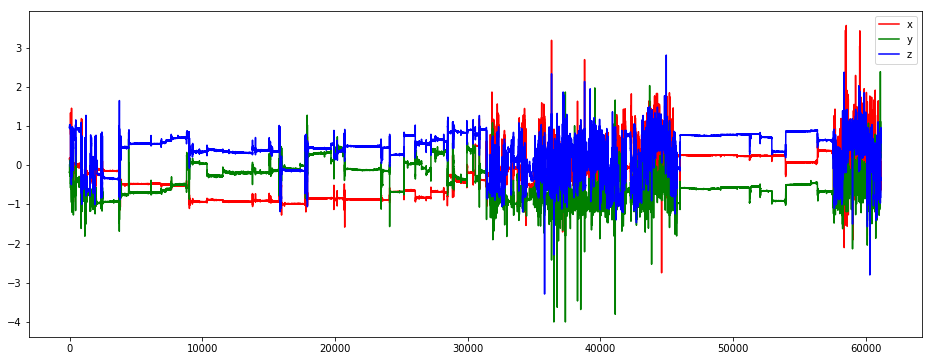

In [138]:
ts1 = [i for i in df_filt['timestamp'] if calc_sec(i[11:])<=calc_sec(ts[0][2])]
df1 = df_filt[df_filt['timestamp'].isin(ts1)]

g = 9.8
df1.loc[:,'x'] = df1['x'].apply(lambda x: x/g)
df1.loc[:,'y'] = df1['y'].apply(lambda x: x/g)
df1.loc[:,'z'] = df1['z'].apply(lambda x: x/g)

plotted = df1.plot(color=('r','g','b'),figsize=(16,6)).legend(loc='upper right')

fig = plotted.get_figure()
fig.savefig('testrun_indy_LH_acc_25-12-18.png')

In [139]:
H = 10
ai1 = []

for i in range(len(df1)):
    xyz_val = []
    if(i-H>=0):
        for j in range(H-1,0,-1):
            xyz_val.append([df1.iloc[i-j,1],df1.iloc[i-j,2],df1.iloc[i-j,3]])
        ai_val = float(equation_bai(xyz_val))
        ai1.append(ai_val)

In [109]:
df1['AI'] = pd.Series(ai1)

df1

,timestamp,x,y,z,AI
0,2018-12-19 16:17:05.126,-0.892084,-0.401884,0.052648,1.000765
1,2018-12-19 16:17:05.288,-0.899414,-0.357909,0.086851,1.000691
2,2018-12-19 16:17:05.452,-0.919447,-0.449768,0.105418,1.000230
3,2018-12-19 16:17:05.611,-0.901857,-0.347648,0.162097,1.000189
4,2018-12-19 16:17:05.777,-0.898925,-0.370124,0.102486,1.000074
5,2018-12-19 16:17:05.937,-0.898436,-0.307582,0.158188,1.000047
6,2018-12-19 16:17:06.1,-0.943877,-0.327615,0.155257,1.000029
7,2018-12-19 16:17:06.263,-0.928730,-0.337876,0.146462,1.000023
8,2018-12-19 16:17:06.426,-0.921401,-0.330546,0.132292,1.000034
9,2018-12-19 16:17:06.586,-0.921890,-0.327615,0.133269,1.000273


In [110]:
ts_ = []
labels = []

with open('times3.txt','r') as f:
    for line in f:
        t = line.strip('\n').split('\t')
        ts_.append(float(t[0]))
        labels.append(t[1])

accum = 0
ts = []
for x in ts_:
    accum += x
    ts.append(round(accum,2))

lb_set = set()
for x in labels:
    lb_set.add(x)

lb_ = list(lb_set)

set_cnt = []
for i in range(len(lb_)):
    set_cnt.append(0)

lb = []
lb.append('NaN')

for x in labels:
    for i in range(len(lb_)):
        if(lb_[i]==x and set_cnt[i]!=1 and lb_[i]!='NaN'):
            set_cnt[i] = 1
            lb.append(x)

colors = ['#808080', '#E6194B', '#3CB44B', '#FFE119', '#4363D8', '#F58231',
          '#911EB4', '#46F0F0', '#F032E6', '#BCF60C', '#008080', '#E6BEFF', 
          '#9A6324', '#800000', '#AAFFC3', '#808000', '#000075']

color_dict = {}
for i in range(len(lb)):
    color_dict[lb[i]] = colors[i]
    
print(color_dict)

lb_color = []
for x in labels:
    lb_color.append(color_dict[x])

print(lb_color)
print(len(lb_color))
print(ts)

{'NaN': '#808080', 'stand': '#E6194B', 'sit': '#3CB44B', 'lay down': '#FFE119', 'walk': '#4363D8'}
['#E6194B', '#3CB44B', '#E6194B', '#FFE119', '#3CB44B', '#FFE119', '#E6194B', '#808080', '#4363D8', '#4363D8', '#808080']
11
[30.5, 60.93, 92.38, 122.81, 152.43, 182.87, 213.73, 224.52, 255.34, 286.42, 290.68]


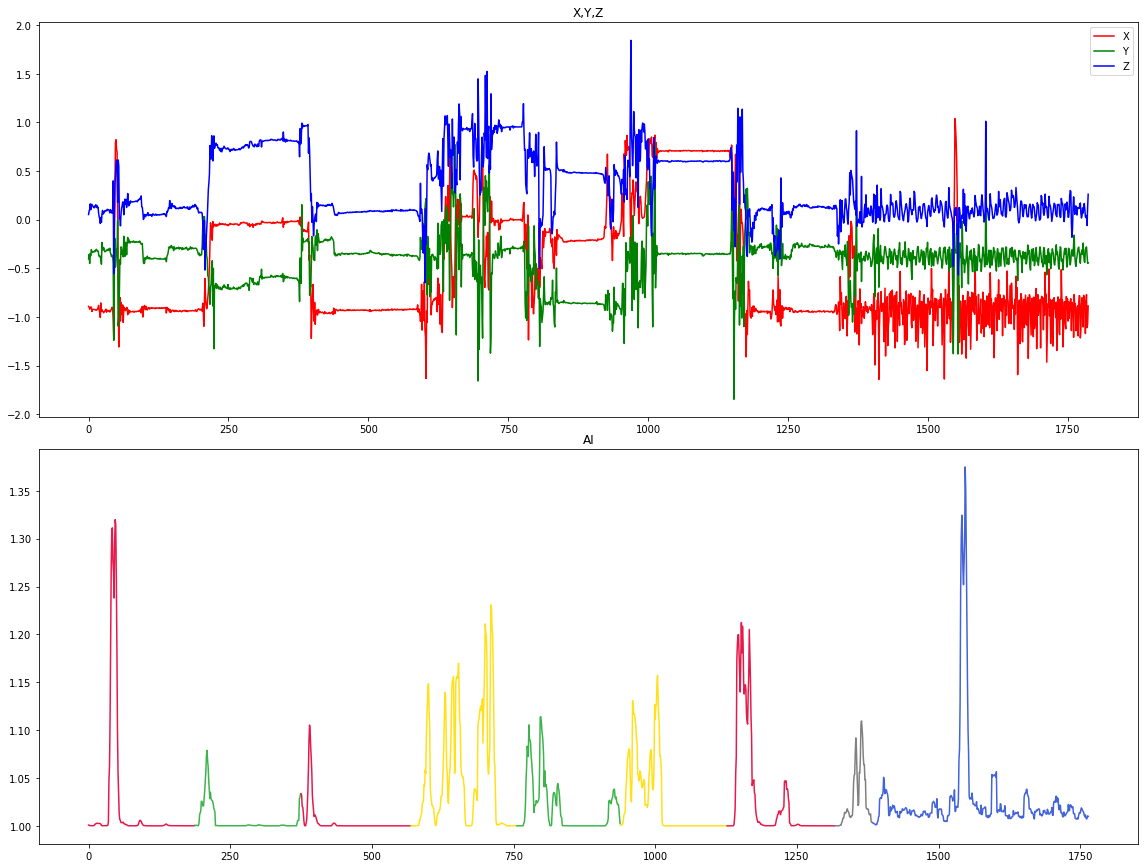

<Figure size 1080x3600 with 0 Axes>

In [111]:
dict1 = df1.to_dict(orient='list')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
fig.tight_layout()

ts_cnt = 0
x_axis = []
y_ai = []

ax = axes[0]
ax.plot(dict1['x'],color='r',label='X')
ax.plot(dict1['y'],color='g',label='Y')
ax.plot(dict1['z'],color='b',label='Z')
ax.legend(loc='upper right')
ax.set_title('X,Y,Z')

ax = axes[1]
for i in range(len(dict1['timestamp'])):
    if(dict1['AI'][i]>0):
        if(calc_sec(dict1['timestamp'][i].split(' ')[1])>calc_sec(start_time)+ts[ts_cnt]):
            ax.plot(x_axis,y_ai,color=lb_color[ts_cnt])
            ts_cnt += 1
            x_axis = []
            y_ai = []
            
            
        
        x_axis.append(i)
        y_ai.append(dict1['AI'][i])
    
ax.set_title('AI')
plt.figure(figsize=(15,50))
fig.savefig('testrun_indy_lh.png', dpi = 300)

plt.show()

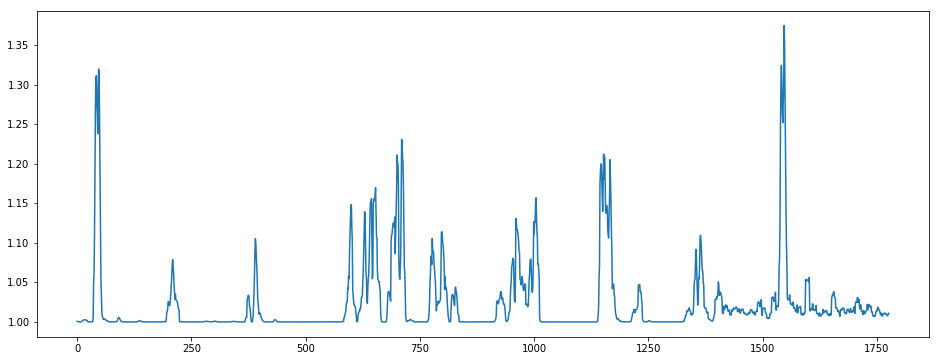

In [112]:
fig = plt.figure(figsize=(16,6))
plt.plot(ai1)
# plt.ylim(top=1.6)
plt.show()

fig.savefig('testrun_indy_LH_AI.png')

In [113]:
df1['AI'] = pd.Series(ai1)

df1.to_csv('SmartwatchData/raw_data/test_acc_indy_lh.csv')
df1

,timestamp,x,y,z,AI
0,2018-12-19 16:17:05.126,-0.892084,-0.401884,0.052648,1.000765
1,2018-12-19 16:17:05.288,-0.899414,-0.357909,0.086851,1.000691
2,2018-12-19 16:17:05.452,-0.919447,-0.449768,0.105418,1.000230
3,2018-12-19 16:17:05.611,-0.901857,-0.347648,0.162097,1.000189
4,2018-12-19 16:17:05.777,-0.898925,-0.370124,0.102486,1.000074
5,2018-12-19 16:17:05.937,-0.898436,-0.307582,0.158188,1.000047
6,2018-12-19 16:17:06.1,-0.943877,-0.327615,0.155257,1.000029
7,2018-12-19 16:17:06.263,-0.928730,-0.337876,0.146462,1.000023
8,2018-12-19 16:17:06.426,-0.921401,-0.330546,0.132292,1.000034
9,2018-12-19 16:17:06.586,-0.921890,-0.327615,0.133269,1.000273
